In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RF

In [34]:
df_28x28_pixel = pd.read_csv(r"C:\BeCode\computervisionData\HAM10000_skin_mnist\hmnist_28_28_L.csv")

In [3]:
df_28x28_pixel.shape

(10015, 785)

In [4]:
df_28x28_pixel.isna().sum()

pixel0000    0
pixel0001    0
pixel0002    0
pixel0003    0
pixel0004    0
            ..
pixel0780    0
pixel0781    0
pixel0782    0
pixel0783    0
label        0
Length: 785, dtype: int64

In [35]:
y = df_28x28_pixel['label']
x = df_28x28_pixel.drop('label', axis = 1).copy().values

In [38]:
y.unique()

array([0, 1], dtype=int64)

In [37]:
for i in range(len(y)):
    if (y[i]== 0) | (y[i] == 2) | (y[i] == 6) | (y[i] == 5):
        y[i] = 0

    else:
        y[i] = 1
    

In [ ]:
# y = df_28x28_pixel['label'].apply(lambda x : 0 if ((x == 'Melanocytic nevi') | (x == 'Benign keratosis-like lesions') | (x == 'Dermatofibroma') | (x == 'Vascular lesions')) else 1)

In [ ]:
# lesion_type_dict = {
#     'nv': 'Melanocytic nevi',
#     'mel': 'Melanoma',
#     'bkl': 'Benign keratosis-like lesions ',
#     'bcc': 'Basal cell carcinoma',
#     'akiec': 'Actinic keratoses',
#     'vasc': 'Vascular lesions',
#     'df': 'Dermatofibroma'
# }
# df_28x28_pixel['label'] = skin_df['dx'].map(lesion_type_dict.get)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  stratify=y)

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
sm = SMOTE(random_state = 2)

In [40]:

x_train, y_train = sm.fit_resample(x_train, y_train)

In [41]:

x_std = StandardScaler().fit_transform(x_train)

In [14]:
# pca = PCA(n_components=100)
# pca.fit(x_std)
# x_features= pca.transform(x_std)

In [42]:
clf = RF(n_estimators = 500)

# Train the classifier
clf = clf.fit(x_std, y_train)

In [16]:
# import xgboost as xgb

In [ ]:
# xgb_model = xgb.XGBClassifier(random_state=42)
# xgb_model.fit(x_features, y_train)

In [43]:
# test the model
test_std = StandardScaler().fit_transform(x_test)
# test_features = pca.transform(test_std)

prediction = clf.predict(test_std)

In [19]:
# # test the model
# test_std = StandardScaler().fit_transform(x_test)
# test_features = pca.transform(test_std)

# xgb_prediction = xgb_model.predict(test_features)

In [12]:
from sklearn import metrics

In [44]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.54      0.53      0.53       670
           1       0.83      0.83      0.83      1834

    accuracy                           0.75      2504
   macro avg       0.68      0.68      0.68      2504
weighted avg       0.75      0.75      0.75      2504



In [45]:
cm = metrics.confusion_matrix(y_test, prediction)

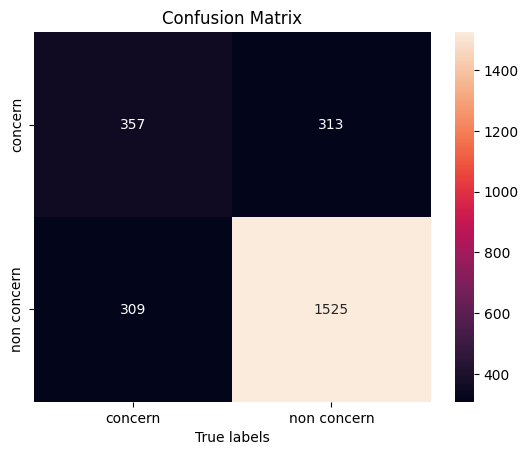

In [47]:
ax= plt.subplot()

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_xlabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['concern', 'non concern']); ax.yaxis.set_ticklabels(['concern', 'non concern']);